# Passo #1
## Exportação de Dados:


*   A partir da plataforma Scopus, extrair um arquivo .csv que contenha as seguintes colunas:
    - Nome dos autores
    - Identificadores únicos dos autores
    - Título do artigo
    - Ano de publicação



### Leitura do arquivo

In [1]:
# prompt: Crie um dataframe do arquivo scopus.csv utilizando a biblioteca panda

import pandas as pd

# Substitua 'scopus.csv' pelo caminho correto do seu arquivo
df = pd.read_csv('scopus.csv')

ModuleNotFoundError: No module named 'pandas'

In [6]:
# Visualização dos 5 primeiros autores do arquivo csv
df.head()

,Authors,Author full names,Author(s) ID,Title,Year,Link
0,Sousa E.L.D.; Marques L.A.D.A.; Lima I.D.S.F.D...,"Sousa, Ewerton L. de (58548243300); Marques, L...",58548243300; 58548808500; 58548808600; 5854796...,Development a Low-Cost Wireless Smart Meter wi...,2023,https://www.scopus.com/inward/record.uri?eid=2...
1,de Oliveira J.G.; Kreutz M.E.,"de Oliveira, Joel Gonçalves (59255885600); Kre...",59255885600; 8833771300,The Blind Spots of Two-Factor Authentication T...,2024,https://www.scopus.com/inward/record.uri?eid=2...
2,Castillo J.S.; Gaete K.P.; Muñoz H.A.; Gallard...,"Castillo, Jaime S. (58099577300); Gaete, Kathe...",58099577300; 58099935900; 58099577400; 5673600...,Scale Mixture of Maxwell-Boltzmann Distribution,2023,https://www.scopus.com/inward/record.uri?eid=2...
3,Contoli C.; Tourani R.; Neto A.; Esposito F.; ...,"Contoli, Chiara (56342819200); Tourani, Reza (...",56342819200; 55849143800; 59337970100; 2300840...,Message from the Chairs,2024,https://www.scopus.com/inward/record.uri?eid=2...
4,Almeida D.B.T.; Alencar M.S.; Duarte R.M.; Sil...,"Almeida, Danilo B. T. (57201084931); Alencar, ...",57201084931; 7004192487; 56039167500; 57188746...,On the Adaptive Modulation for User-Centric Ce...,2024,https://www.scopus.com/inward/record.uri?eid=2...


# Passo #2
## Criação da Rede de Co-Autoria:

*   Utilizando os dados extraídos, deveremos criar uma rede de co-autoria. Neste grafo, os vértices serão os autores e as arestas representarão a colaboração entre eles.



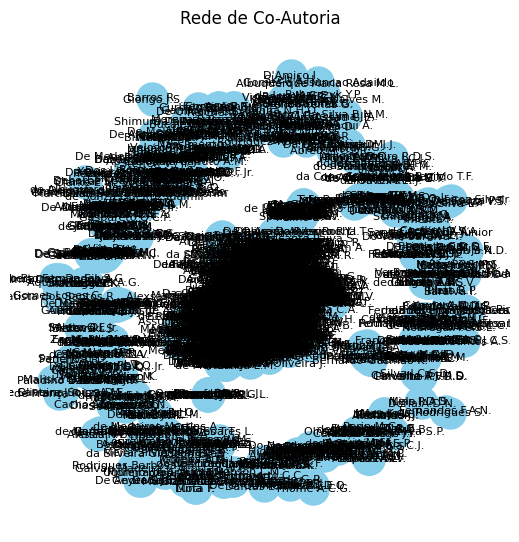

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Criar um grafo vazio
G = nx.Graph()

# Iterar sobre cada linha do DataFrame
for index, row in df.iterrows():
    autores = row['Authors'].split(';')  # Assumindo que os autores estão separados por ponto e vírgula
    # Criar arestas para todos os pares de autores
    for i in range(len(autores)):
        for j in range(i + 1, len(autores)):
            G.add_edge(autores[i].strip(), autores[j].strip()) #Função da biblioteca networkx

# Desenhar o grafo
plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, font_size=8, edge_color='gray')
plt.title('Rede de Co-Autoria')
plt.show()


# Passo #3
## Análises na Rede:

Realizar as seguintes análises utilizando o NetworkX (use as funções já implementadas na ferramenta):

#### Densidade da Rede:
* Calcular a densidade, que mede o quão conectados estão os autores em relação ao número máximo possível de conexões.

#### Sub-Grafo:
* Gerar um sub-grafo contendo apenas os vértices que possuem pelo menos X vizinhos.

#### Histograma dos Graus:
* Criar um gráfico de histograma mostrando a distribuição do grau dos vértices da rede. O grau de um vértice representa o número de co-autores com os quais ele colaborou.

#### Densidade da Rede:

In [18]:
# Calcular a densidade da rede
densidade_rede = nx.density(G)
print(f'Densidade da rede: {densidade_rede:.4f}')

Densidade da rede: 0.0094


#### Sub-Grafo:

In [37]:
X = 315  # Defina o valor de X
sub_grafo = G.subgraph([n for n, d in G.degree() if d >= X])

# Calcular a densidade do sub-grafo
densidade_sub_grafo = nx.density(sub_grafo)
print(f'Densidade do sub-grafo com pelo menos {X} vizinhos: {densidade_sub_grafo:.4f}')


Densidade do sub-grafo com pelo menos 315 vizinhos: 1.0000


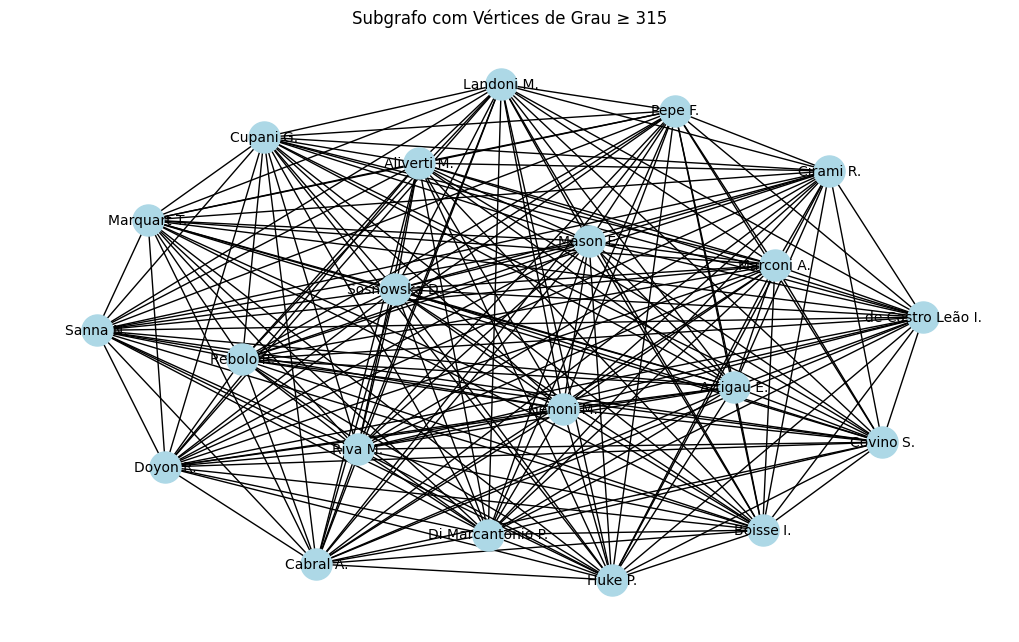

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Suponha que G seja o grafo original
X = 315  # Defina o valor de X, o número mínimo de vizinhos

# Crie um subgrafo com vértices que possuem pelo menos X vizinhos
subgraph_nodes = [n for n, d in G.degree() if d >= X]
subgraph = G.subgraph(subgraph_nodes)

# Plote o subgrafo
plt.figure(figsize=(10, 6))
nx.draw(subgraph, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title(f'Subgrafo com Vértices de Grau ≥ {X}')
plt.show()


In [36]:
# Grau de contribuição do autor Huke P.
G.degree('Huke P.')

316

#### Histograma dos Graus:

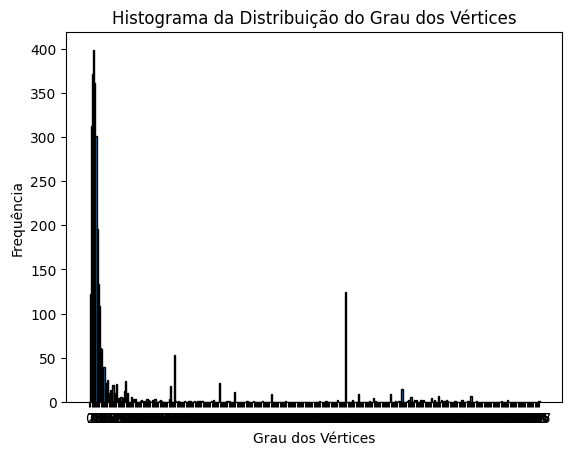

In [20]:
import matplotlib.pyplot as plt

# Obter os graus dos vértices
graus = [d for n, d in G.degree()]

# Criar o histograma
plt.hist(graus, bins=range(max(graus) + 2), align='left', edgecolor='black')
plt.xlabel('Grau dos Vértices')
plt.ylabel('Frequência')
plt.title('Histograma da Distribuição do Grau dos Vértices')
plt.xticks(range(max(graus) + 1))
plt.show()


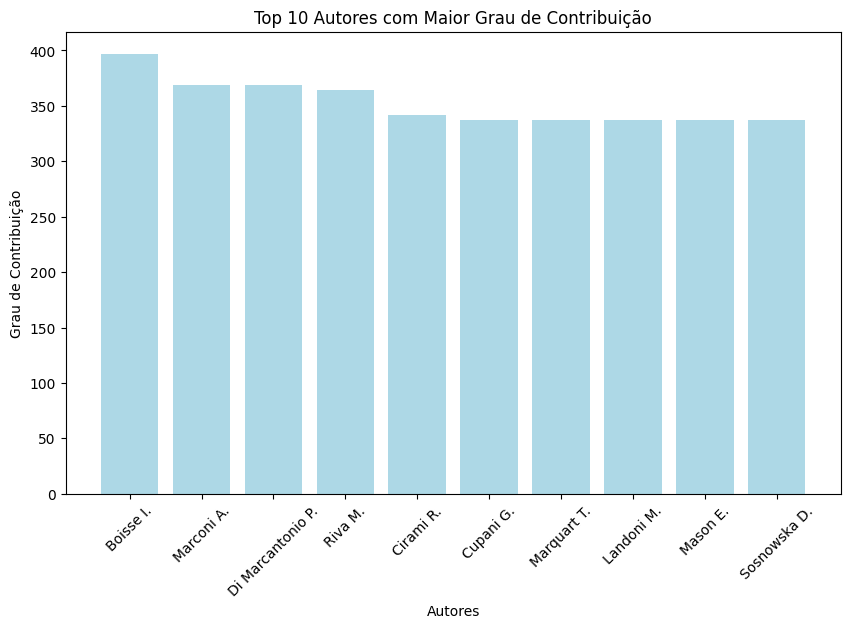

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular os graus de todos os nós
degree_dict = dict(G.degree())
degree_df = pd.DataFrame(degree_dict.items(), columns=['Author', 'Degree'])

# Classificar por grau em ordem decrescente
degree_df = degree_df.sort_values(by='Degree', ascending=False)

# Visualizar os 10 autores com maior grau
top_authors = degree_df.head(10)

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(top_authors['Author'], top_authors['Degree'], color='lightblue')
plt.xlabel('Autores')
plt.ylabel('Grau de Contribuição')
plt.title('Top 10 Autores com Maior Grau de Contribuição')
plt.xticks(rotation=45)
plt.show()


In [39]:
G.degree('Boisse I.')

397